In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()

Saving car_age_price.csv to car_age_price.csv


{'car_age_price.csv': b'Year,Price\r2018,465000\r2019,755000\r2019,700000\r2018,465000\r2018,465000\r2015,350000\r2016,425000\r2017,575000\r2017,509999\r2017,575000\r2019,500000\r2018,500000\r2017,500000\r2019,600000\r2017,475000\r2017,500000\r2017,500000\r2017,550000\r2019,500000\r2017,500000\r2018,500000\r2019,500000\r2015,434999\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2019,650000\r2017,550000\r2017,550000\r2017,550000\r2017,450000\r2017,550000\r2017,550000\r2017,486000\r2018,475000\r2020,545000\r2019,525000\r2019,600000\r2018,550000\r2019,550000\r2019,550000\r2018,450000\r2019,500000\r2018,450000\r2016,396000\r2018,600000\r2013,325000\r2018,550000\r2013,345000\r2013,345000\r2017,525000\r2017,550000\r2014,341000\r2017,550000\r2014,450000\r2016,550000\r2015,490000\r2017,540000\r2017,540000\r2017,595000\r2015,490000\r2017,495000\r2017,525000\r2015,400000\r2015,465000\r2015,300000\r2015,450000\r2017,490000\r2015,300000\r2013,320000\r20

In [3]:
data=pd.read_csv('car_age_price.csv')

In [4]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
data.shape

(112, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [7]:
data.nunique()

Year      8
Price    35
dtype: int64

In [25]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [27]:
X = data.drop('Price', axis=1)
y = data['Price']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
model = lr.fit(X_train, y_train)

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [39]:
print('MSE is:', mean_squared_error(y_pred, y_test))
print('R Squared value is:', r2_score(y_pred, y_test))

MSE is: 4326906256.829671
R Squared value is: 0.4052626156692436


In [40]:
print('MSE is:', mean_squared_error(y_test, y_pred))
print('R Squared value is:', r2_score(y_test, y_pred))

MSE is: 4326906256.829671
R Squared value is: 0.36759313425902185


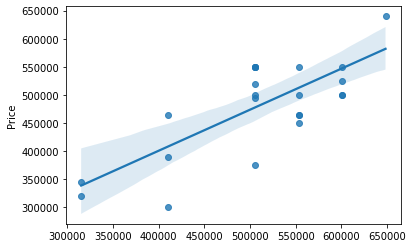

In [41]:
sns.regplot(x=y_pred, y=y_test)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
stdsclr = StandardScaler()

In [45]:
X1_train = stdsclr.fit_transform(X_train)
X1_test = stdsclr.fit_transform(X_test)

In [46]:
model1 = lr.fit(X1_train, y_train)

In [47]:
y_pred1 = model1.predict(X1_test)

In [48]:
y_pred1

array([563875.67324138, 481097.54651763, 522486.60987951, 522486.60987951,
       522486.60987951, 398319.41979387, 481097.54651763, 522486.60987951,
       563875.67324138, 563875.67324138, 315541.29307012, 481097.54651763,
       398319.41979387, 605264.73660326, 522486.60987951, 563875.67324138,
       315541.29307012, 398319.41979387, 481097.54651763, 481097.54651763,
       481097.54651763, 481097.54651763, 481097.54651763])

In [49]:
print('MSE is:', mean_squared_error(y_test, y_pred1))
print('R Squared value is:', r2_score(y_test, y_pred1))

MSE is: 3112075542.962884
R Squared value is: 0.5451489301466084


In [51]:
X_test

,Year
40,2019
65,2017
4,2018
47,2018
42,2018
69,2015
26,2017
11,2018
10,2019
44,2019


In [55]:
Year = [2022]
X_test_2022 = pd.DataFrame(Year, columns=['Year'])

In [56]:
X_test_2022

,Year
0,2022


In [59]:
X_test_2022.dtypes

Year    int64
dtype: object

In [57]:
y_pred_2022 = model.predict(X_test_2022)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [58]:
y_pred_2022

array([1.5042133e+08])